# Material properties

Each **geometry** has an associated **material**. The **material** is a set of parameters that defines how light interacts with the **geometry**. Here is a test scene to demonstrate these properties.

In [1]:
import fresnel
import math
device = fresnel.Device()
scene = fresnel.Scene(device)
position = []
for k in range(5):
    for i in range(5):
        for j in range(5):
            position.append([2*i, 2*j, 2*k])
geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)

## Material color

The **color** of a material sets its base color. Default material parameters set a primarily diffuse material with light specular highlights.

In [2]:
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.9,0.714,0.169]))

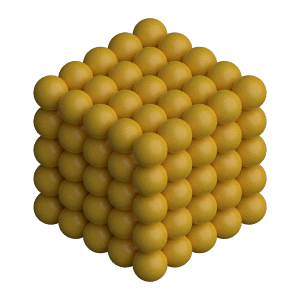

In [3]:
fresnel.pathtrace(scene, w=300, h=300, light_samples=40)

## Solid color materials

Set the **solid** parameter to 1.0 to disable material interaction with light. A **solid** material has no shading applied and always displays as **color**.

In [4]:
geometry.material.solid = 1.0

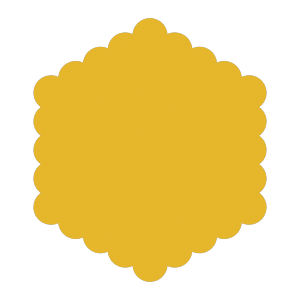

In [5]:
fresnel.preview(scene, w=300, h=300)

## Geometry / primitive color mixing

Set **primitive_color_mix** to any value in the range 0.0 to 1.0 to control the amount that the per-primitive colors mix with the geometry color.

In [6]:
geometry.material.primitive_color_mix = 0.5
geometry.color[::2] = fresnel.color.linear([0,0,0])
geometry.color[1::2] = fresnel.color.linear([1,1,1])

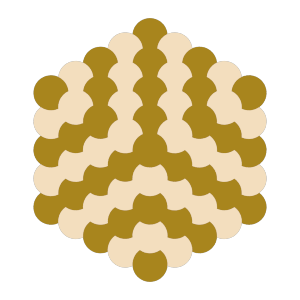

In [7]:
fresnel.preview(scene, w=300, h=300)

Typical use cases utilize values of either 0.0 (force a single color defined by the material) or 1.0 (force the per primitive color.)

In [8]:
geometry.material.primitive_color_mix = 1.0

geometry.color[::4] = fresnel.color.linear([0.25,0.5,1])
geometry.color[1::4] = fresnel.color.linear([1,0.714,0.169])
geometry.color[2::4] = fresnel.color.linear([0.42,0.267,1])
geometry.color[3::4] = fresnel.color.linear([1,0.874,0.169])

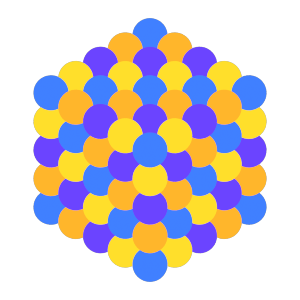

In [9]:
fresnel.preview(scene, w=300, h=300)

To use a **matplotlib** color map, pass the output of the color map to `fresnel.color.linear` so the output colors appear as intended.

In [10]:
import matplotlib, matplotlib.cm
import numpy
geometry.material.solid = 0.0
mapper = matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True),
                                      cmap = matplotlib.cm.get_cmap(name='viridis'))

v = numpy.linspace(0,1,len(position))
geometry.color[:] = fresnel.color.linear(mapper.to_rgba(v))

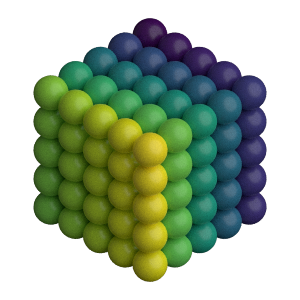

In [11]:
fresnel.pathtrace(scene, w=300, h=300, light_samples=40)

## All properties

Materials have a number of intuitive properties. All are defined in a nominal range from 0 to 1, though some values can be pushed past 1 for extremely strong effects.

* roughness - Set the roughness of the material. Recommend values >= 0.1.
* specular - Control the strength of the specular highlights
* metal - 0: dielectric materials (plastic, glass, etc...). 1: pure metals.
* spec_trans - Set the fraction of light that passes through the material.

Here are some examples of different material parameters.

In [12]:
scene2 = fresnel.Scene(device)
spheres = []
for i in range(11):
    spheres.append(fresnel.geometry.Sphere(scene2, position = (i, 0, 0), radius=0.4))
    spheres[i].material = fresnel.material.Material(color=(.1,.7,.1))

tracer = fresnel.tracer.Path(device=device, w=1000, h=75)

scene2.lights = [fresnel.light.Light(direction=(1,1,-1), color=(0.5, 0.5, 0.5)),
                 fresnel.light.Light(direction=(-1,-1,1), color=(0.5, 0.5, 0.5))]

### Examples

These examples are front lit from the lower left and back lit from the upper right.

Vary roughness in a specular material from 0.1 to 1.1

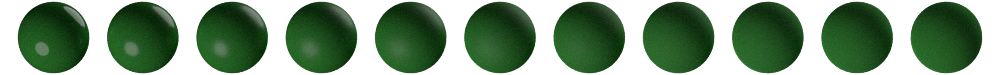

In [13]:
for i in range(11):
    spheres[i].material.specular = 1.0
    spheres[i].material.roughness = i/10+0.1

tracer.sample(scene2, samples=64, light_samples=40)

Vary specular from 0 to 1 with constant roughness.

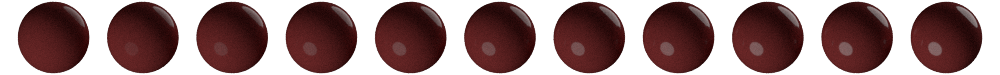

In [14]:
for i in range(11):
    spheres[i].material.specular = i/10
    spheres[i].material.roughness = 0.1
    spheres[i].material.color=(.7,.1,.1)

tracer.sample(scene2, samples=64, light_samples=40)

The following examples use cloudy lighting which places a bright hemisphere of light above the scene and a dim hemisphere of light below the scene.

Vary metal from 0 to 1 with a rough material. (metal materials look best when there is other geometry to reflect from the surface)

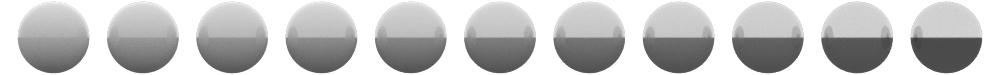

In [15]:
for i in range(11):
    spheres[i].material.specular = 1.0
    spheres[i].material.color=(.7,.7,.7)
    spheres[i].material.metal = i/10

scene2.lights = fresnel.light.cloudy()
tracer.sample(scene2, samples=64, light_samples=40)

Vary spec_trans from 0 to 1 with all other quantities constant.

In [ ]:
for i in range(11):
    spheres[i].material.metal = 0.0   
    spheres[i].material.spec_trans = i/10
    spheres[i].material.color=(.1,.1,.7)

tracer.sample(scene2, samples=64, light_samples=40)

Execute this notebook with **ipywidgets** installed and use the panel below to explore the material parameters and how they react to different lighting angles.

In [ ]:
import ipywidgets

tracer.resize(450,450)

@ipywidgets.interact(color=ipywidgets.ColorPicker(value='#1c1c7f'),
                     primitive_color_mix=ipywidgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1, continuous_update=False),
                     roughness=ipywidgets.FloatSlider(value=0.3, min=0.1, max=1.0, step=0.1, continuous_update=False),
                     specular=ipywidgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.1, continuous_update=False),
                     spec_trans=ipywidgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1, continuous_update=False),
                     metal=ipywidgets.FloatSlider(value=0, min=0.0, max=1.0, step=1.0, continuous_update=False),
                     light_theta=ipywidgets.FloatSlider(value=5.5, min=0.0, max=2*math.pi, step=0.1, continuous_update=False),
                     light_phi=ipywidgets.FloatSlider(value=0.8, min=0.0, max=math.pi, step=0.1, continuous_update=False))
def test(color, primitive_color_mix, roughness, specular, spec_trans, metal, light_theta, light_phi):
    r = int(color[1:3], 16)/255;
    g = int(color[3:5], 16)/255;
    b = int(color[5:7], 16)/255;
    scene.lights[0].direction = (math.sin(light_phi)*math.cos(-light_theta),
                                 math.cos(light_phi),
                                 math.sin(light_phi)*math.sin(-light_theta))
    
    scene.lights[1].theta = math.pi
    geometry.material = fresnel.material.Material(color=fresnel.color.linear([r,g,b]),
                                                  primitive_color_mix=primitive_color_mix,
                                                  roughness=roughness,
                                                  metal=metal,
                                                  specular=specular,
                                                  spec_trans=spec_trans
                                                 )
    return tracer.sample(scene, samples=64, light_samples=1)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.